## Librerias

In [39]:
## Tratamiento
import pandas as pd
import numpy as np
from math import sqrt

## Graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
from utils.functions import Graficador

## Machine Learning
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## Aplicacion
from flask import Flask

## Data

In [2]:
titanic = pd.read_csv('data/titanic.csv', index_col='PassengerId')

## Análisis

### Descriptivos

In [3]:
titanic.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [5]:
pd.DataFrame([titanic.isna().sum(),titanic.isna().sum()*100/len(titanic.Transported)],index = ['conteo missing','% missings']).T

,conteo missing,% missings
HomePlanet,201.0,2.312205
CryoSleep,217.0,2.496261
Cabin,199.0,2.289198
Destination,182.0,2.093639
Age,179.0,2.059128
VIP,203.0,2.335212
RoomService,181.0,2.082135
FoodCourt,183.0,2.105142
ShoppingMall,208.0,2.392730
Spa,183.0,2.105142


In [6]:
titanic.describe(exclude=object)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,4378
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


In [7]:
titanic.describe(include=['O'])

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


### Univariante

In [8]:
def separar_columnas_numericas_categoricas_bool(df):
    columnas_numericas = []
    columnas_categoricas = []
    columnas_booleanas = []

    for columna in df.columns:
        if pd.api.types.is_bool_dtype(df[columna]):
            columnas_booleanas.append(columna)
        elif pd.api.types.is_numeric_dtype(df[columna]):
            columnas_numericas.append(columna)
        else:
            columnas_categoricas.append(columna)

    return columnas_numericas, columnas_categoricas, columnas_booleanas

In [9]:
num_, cat_, bool_ = separar_columnas_numericas_categoricas_bool(titanic)

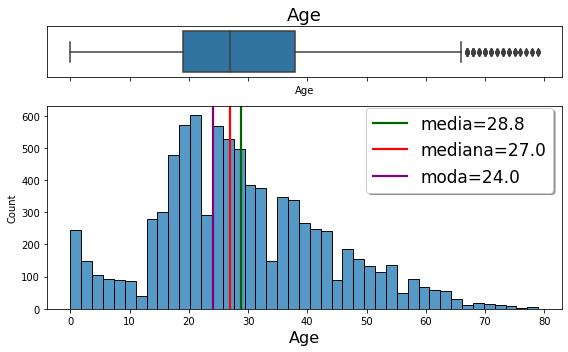

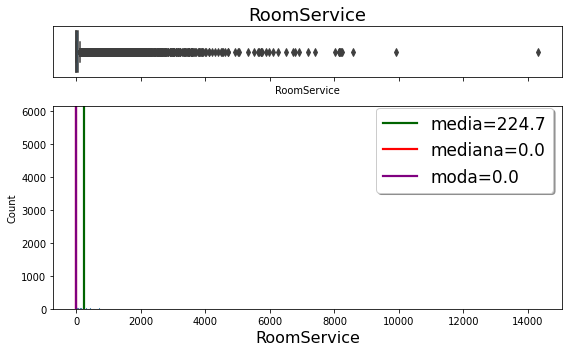

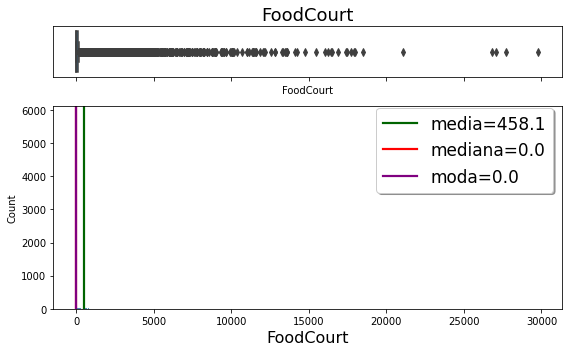

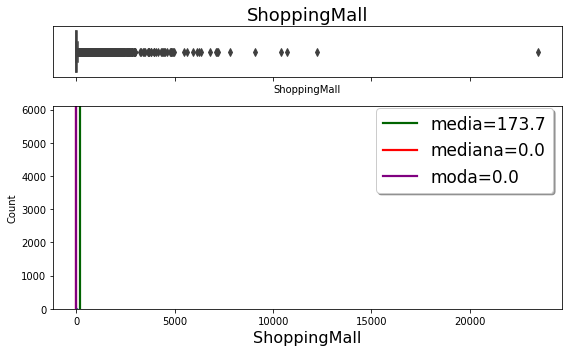

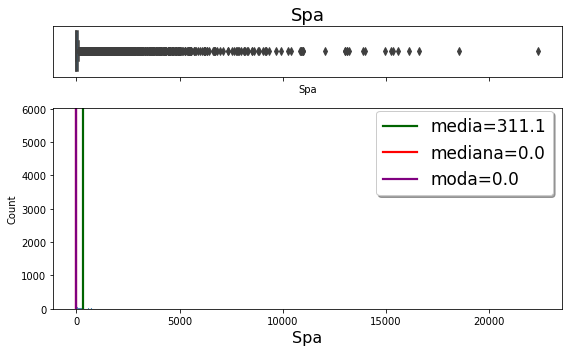

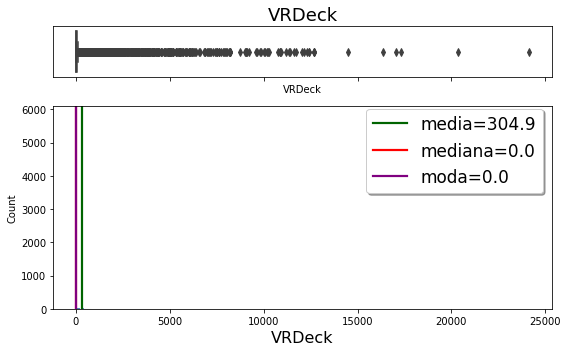

In [10]:
for i in num_:
    Graficador.grafico_numerico(titanic, i, i, '')

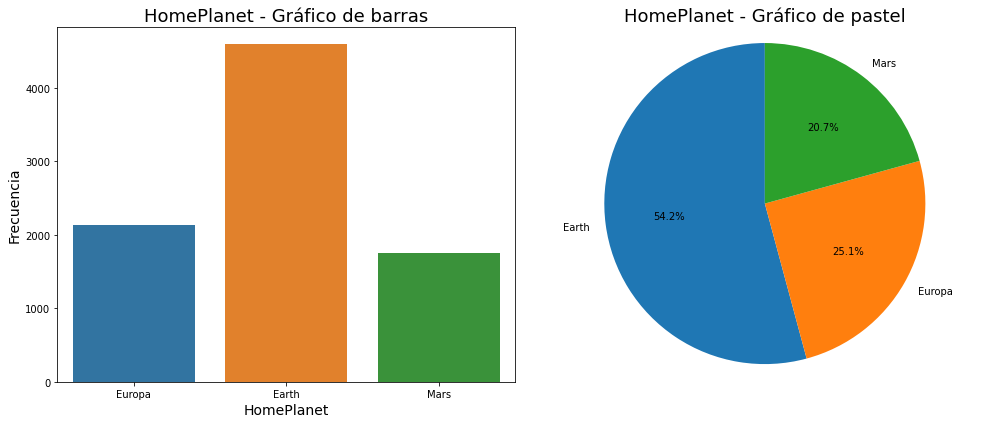

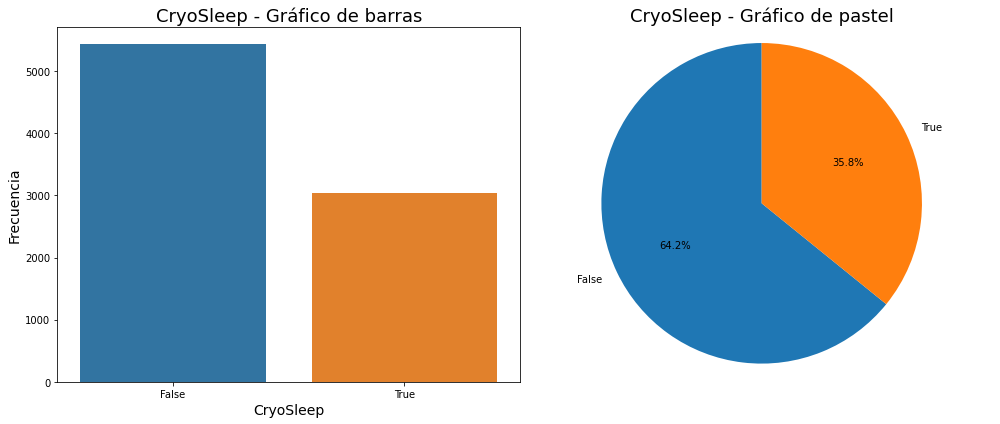

La columna 'Cabin' tiene demasiados valores únicos (6560) en relación con el número de filas (8693). No se graficará.


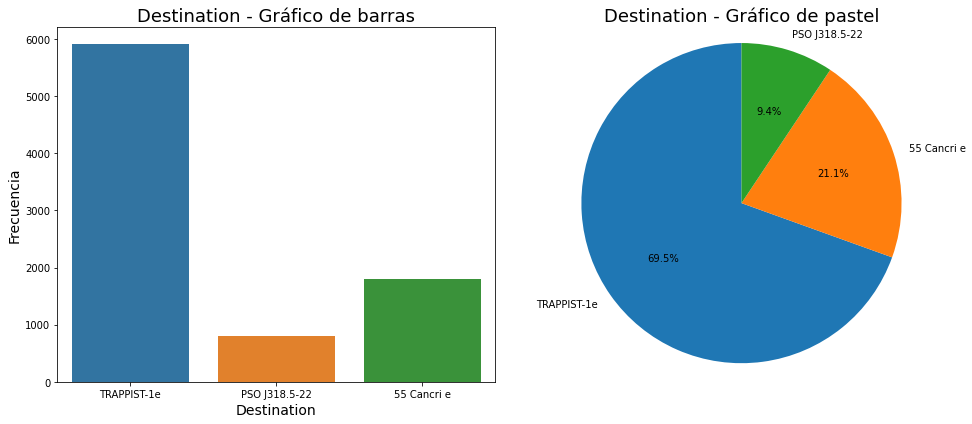

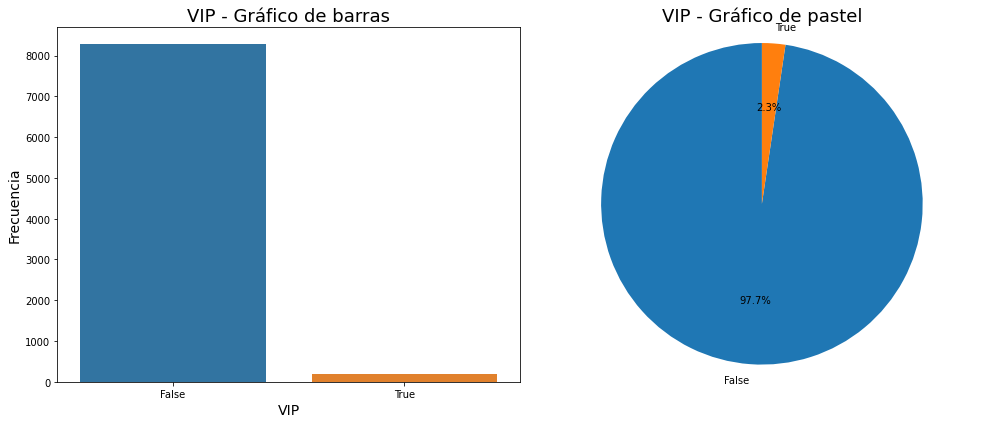

La columna 'Name' tiene demasiados valores únicos (8473) en relación con el número de filas (8693). No se graficará.


In [11]:
for i in cat_:
    Graficador.grafico_categorico(titanic, i, i)

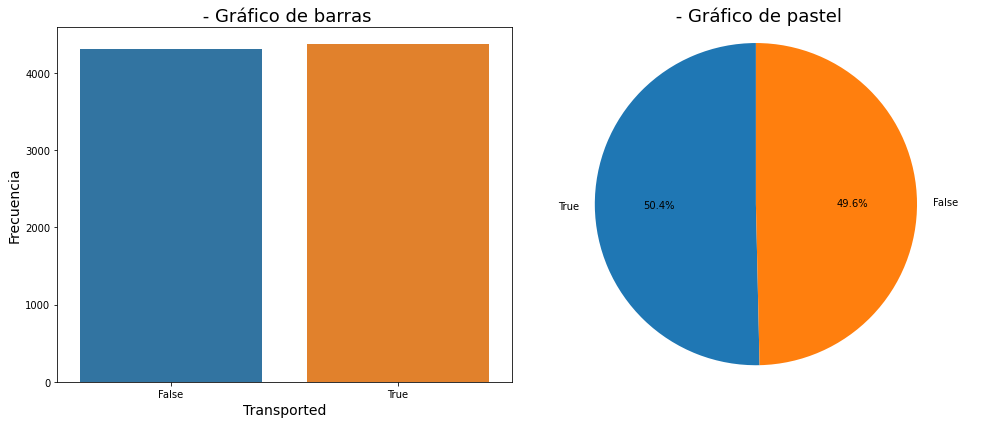

In [12]:
for i in bool_:
    Graficador.grafico_categorico(titanic, i, '')

## Limpieza

Se realiza un feature `Feature Engineer` de la columna `Cabin`

In [13]:
titanic['Cabin'].fillna('Z/9999/Z', inplace=True)

In [14]:
def split_cabin(cabin):
    deck, number, side = cabin.split('/')
    
    deck = None if deck == 'Z' else deck
    number = None if int(number) == 9999 else int(number)
    side = None if side == 'Z' else side
    
    return deck, number, side

titanic['Cabin_deck'], titanic['Cabin_number'], titanic['Cabin_side'] = zip(*titanic['Cabin'].apply(split_cabin))

In [15]:
titanic

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side
PassengerId,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S


Eliminamos las columnas `Name` y `Cabin`

In [16]:
titanic.drop(columns=['Name','Cabin'], inplace=True)

Imputaremos los valores faltantes de las columnas categoricas con el metodo de `KNNimputer`

In [17]:
categorical_cols = [cname for cname in titanic.columns if (titanic[cname].dtype == "object")]
categorical_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']

Variables Categoricas

In [18]:
encoder = ce.OrdinalEncoder(cols=categorical_cols)

# Ajustar y transformar los datos
titanic = encoder.fit_transform(titanic)

In [19]:
titanic.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_number,Cabin_side
PassengerId,,,,,,,,,,,,,,
0001_01,1,1,1,39.0,1,0.0,0.0,0.0,0.0,0.0,False,1,0.0,1
0002_01,2,1,1,24.0,1,109.0,9.0,25.0,549.0,44.0,True,2,0.0,2
0003_01,1,1,1,58.0,2,43.0,3576.0,0.0,6715.0,49.0,False,3,0.0,2
0003_02,1,1,1,33.0,1,0.0,1283.0,371.0,3329.0,193.0,False,3,0.0,2
0004_01,2,1,1,16.0,1,303.0,70.0,151.0,565.0,2.0,True,2,1.0,2


In [20]:
titanic.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_deck', 'Cabin_number', 'Cabin_side'],
      dtype='object')

In [21]:
numerical_cols = [col for col in titanic.columns if col not in categorical_cols]
numerical_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Cabin_number']

In [22]:
knn = KNNImputer(n_neighbors=int(sqrt(titanic.shape[0])), weights= 'distance', metric= 'nan_euclidean')

titanic[numerical_cols] = knn.fit_transform(titanic[numerical_cols])
titanic.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_number,Cabin_side
PassengerId,,,,,,,,,,,,,,
0001_01,1,1,1,39.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1
0002_01,2,1,1,24.0,1,109.0,9.0,25.0,549.0,44.0,1.0,2,0.0,2
0003_01,1,1,1,58.0,2,43.0,3576.0,0.0,6715.0,49.0,0.0,3,0.0,2
0003_02,1,1,1,33.0,1,0.0,1283.0,371.0,3329.0,193.0,0.0,3,0.0,2
0004_01,2,1,1,16.0,1,303.0,70.0,151.0,565.0,2.0,1.0,2,1.0,2


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   float64
 11  Cabin_deck    8693 non-null   int32  
 12  Cabin_number  8693 non-null   float64
 13  Cabin_side    8693 non-null   int32  
dtypes: float64(8), int32(6)
memory usage: 1.0+ MB


In [24]:
# PowerTransformer para pasar a distribución normal las continuas
yeo = PowerTransformer(method='yeo-johnson')
# estandarización para las numéricas
numerical_transformer = StandardScaler()
# Dummies para las categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False, drop = 'first')
# sparse = False te devuelve array y no matriz
# drop = 'first' te elimina la primera de las columnas

# Pipeline de las categóricas
num_pipe = Pipeline(steps=[('powert',yeo), # transf para convertir a normal la distribución
                           ('scaler',numerical_transformer)]) # estandarizamos las continuas

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_pipe, numerical_cols), # estandarizamos las continuas
        ('cat',categorical_transformer, categorical_cols) # pasamos a dummies las categóricas
    ])

preprocessor.fit(titanic)
names = []
for i in preprocessor.get_feature_names_out():
    names.append(i[5:])

In [25]:
Ytrain = titanic['Transported']
Xtrain = pd.DataFrame(preprocessor.fit_transform(titanic))
Xtrain.columns = names
Xtrain.drop(columns='Transported', inplace=True)

In [26]:
titanic = pd.concat([Xtrain,Ytrain.reset_index(drop=True)], axis= 1)

In [28]:
X = titanic.drop(columns= 'Transported')
y = titanic['Transported']

In [29]:
X_train, y_train, X_test, y_test = train_test_split(X,y,test_size=.20,random_state=73)

In [30]:
kf = KFold(n_splits = 5, shuffle=True, random_state = 0)

In [33]:
models = []
models.append(('glm', LogisticRegression(random_state=73)))
models.append(('dectree', DecisionTreeClassifier(random_state=73)))
models.append(('rf', RandomForestClassifier(random_state=73)))
models.append(('gb', GradientBoostingClassifier(random_state=73)))
models.append(('xgb', XGBClassifier()))
models.append(('bag', BaggingClassifier(random_state=73)))
models.append(('svmr', SVC(random_state=73)))
models.append(('catb', CatBoostClassifier(random_state=73)))
models.append(('bagg', BaggingClassifier(random_state=73)))
models.append(('gaunb', GaussianNB()))
models.append(('knec', KNeighborsClassifier()))

def boxplots_algorithms(results, names):

    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

Learning rate set to 0.023581
0:	learn: 0.6810481	total: 3.72ms	remaining: 3.72s
1:	learn: 0.6704262	total: 6.88ms	remaining: 3.44s
2:	learn: 0.6584490	total: 10.3ms	remaining: 3.42s
3:	learn: 0.6482085	total: 13.5ms	remaining: 3.37s
4:	learn: 0.6405237	total: 16.6ms	remaining: 3.31s
5:	learn: 0.6312476	total: 19.9ms	remaining: 3.29s
6:	learn: 0.6227396	total: 23ms	remaining: 3.26s
7:	learn: 0.6147553	total: 26.2ms	remaining: 3.25s
8:	learn: 0.6071317	total: 29.8ms	remaining: 3.28s
9:	learn: 0.6008822	total: 32.9ms	remaining: 3.26s
10:	learn: 0.5951723	total: 36ms	remaining: 3.23s
11:	learn: 0.5882035	total: 39.1ms	remaining: 3.22s
12:	learn: 0.5822914	total: 42.4ms	remaining: 3.22s
13:	learn: 0.5770385	total: 45.7ms	remaining: 3.22s
14:	learn: 0.5726070	total: 48.8ms	remaining: 3.2s
15:	learn: 0.5674400	total: 52ms	remaining: 3.19s
16:	learn: 0.5622196	total: 55.2ms	remaining: 3.19s
17:	learn: 0.5564571	total: 58.7ms	remaining: 3.2s
18:	learn: 0.5522962	total: 62ms	remaining: 3.2s
19:

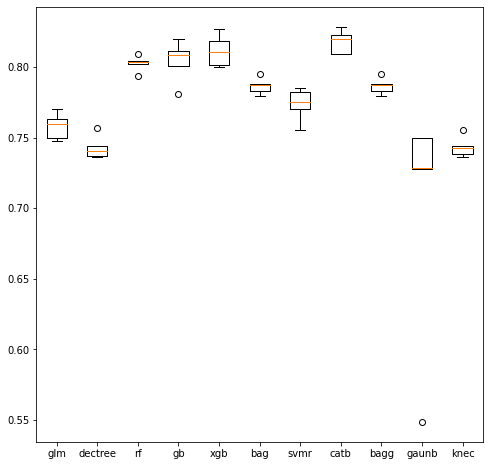

In [34]:
results = []
names = []

for name,model in models:
    acc = cross_val_score(model, Xtrain,Ytrain, cv = kf,scoring='accuracy')
    names.append(name)
    results.append(acc)

boxplots_algorithms(results, names)

In [38]:
results_df = pd.DataFrame(results, index=names)
results_df['mean_accuracy'] = results_df.mean(axis=1)
results_df.sort_values(by='mean_accuracy',ascending=False)

,0,1,2,3,4,mean_accuracy
catb,0.822312,0.820012,0.809086,0.828539,0.808976,0.817785
xgb,0.826912,0.810811,0.799885,0.818757,0.801496,0.811572
gb,0.801035,0.811386,0.780909,0.819908,0.808400,0.804328
rf,0.809086,0.804485,0.793560,0.802071,0.803797,0.802600
bag,0.783209,0.794710,0.779758,0.787687,0.787112,0.786495
bagg,0.783209,0.794710,0.779758,0.787687,0.787112,0.786495
svmr,0.775158,0.770558,0.755607,0.785386,0.782509,0.773843
glm,0.759632,0.769983,0.749856,0.747411,0.762946,0.757966
knec,0.755607,0.742381,0.736055,0.743959,0.738205,0.743241
dectree,0.737205,0.744106,0.756757,0.736479,0.740506,0.743011


Elegimos los 4 primeros para buscar hiperparametros

In [42]:
pipe_catb = Pipeline([('catb', CatBoostClassifier(random_state=73, verbose=0))])

param_grid_catb = {
    'catb__depth': [6, 8, 10],
    'catb__learning_rate': [0.01, 0.05, 0.1],
    'catb__iterations': [30, 50, 100]
}

grid_catb = GridSearchCV(pipe_catb, param_grid_catb, cv=5, scoring='accuracy')
grid_catb.fit(X_train, y_train)
print(grid_catb.best_params_)
print(grid_catb.best_score_)
pred = grid_catb.predict(X_test)
print(accuracy_score(y_test, pred))

{'catb__depth': 8, 'catb__iterations': 30, 'catb__learning_rate': 0.1}
0.8031783540267247


In [43]:
pipe_xgb = Pipeline([('xgb', XGBClassifier(random_state=73))])

param_grid_xgb = {
    'xgb__max_depth': [6, 8, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__n_estimators': [100, 200]
}

grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_params_)
print(grid_xgb.best_score_)
pred = grid_xgb.predict(X_test)
print(accuracy_score(y_test, pred))

{'xgb__learning_rate': 0.01, 'xgb__max_depth': 8, 'xgb__n_estimators': 200}
0.7905271405136742


In [44]:
pipe_gb = Pipeline([('gb', GradientBoostingClassifier(random_state=73))])

param_grid_gb = {
    'gb__max_depth': [3, 5, 8],
    'gb__learning_rate': [0.01, 0.05, 0.1],
    'gb__n_estimators': [100, 200]
}

grid_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)
print(grid_gb.best_params_)
print(grid_gb.best_score_)
pred = grid_gb.predict(X_test)
print(accuracy_score(y_test, pred))

{'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 100}
0.7957019331110363


In [45]:
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=73))])

param_grid_rf = {
    'rf__max_depth': [10, 20, 30],
    'rf__n_estimators': [100, 200],
    'rf__max_features': ['auto', 'sqrt']
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
print(grid_rf.best_score_)
pred = grid_rf.predict(X_test)
print(accuracy_score(y_test, pred))

c:\Users\jamr1\miniconda3\envs\este\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\jamr1\miniconda3\envs\este\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\jamr1\miniconda3\envs\este\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

{'rf__max_depth': 10, 'rf__max_features': 'auto', 'rf__n_estimators': 100}
0.796737143087803
